<a href="https://colab.research.google.com/github/Matheus-Fernandes-Gomes/AEDS2/blob/main/Analise%20de%20dados%20com%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **TERCEIRA AVALIAÇÃO SEMESTRAL DE ADS**

**Alunos:** `Matheus Fernandes Gomes`   **Matricula:** `17.2.5941` <br>
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;           `Thiago Rodrigues Sousa  `  &nbsp;  **Matricula:** `19.1.8995`


**Importando Biblioteca**

In [154]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Importação dos dados**

In [155]:
df=pd.read_csv('./WORKLOAD.tsv', \
               sep='\t', decimal='.')
df.head()


,Unnamed: 0,DATE,TIME,CPU3,CPU2,IO_DISK1,IO_DISK2,IO_DISK3,READS_DISK1,READS_DISK2,READS_DISK3,WRITES_DISK1,WRITES_DISK2,WRITES_DISK3
0,0,2023-01-24,05:13:00,8.919091,104.533151,75,616,7,10.773920,8.245730,1.867983e+07,2.701182,1.004415e+00,7.755294e+06
1,1,2023-01-17,13:21:00,6.352267,1.348326,74,805,10,10.107078,3.335116,1.832761e-05,2.077675,9.135174e+04,1.386328e+06
2,2,2023-01-20,01:08:00,13.267720,0.175701,35,174,5,18.139521,4.947451,9.903657e+07,6.717166,1.798021e+06,5.641578e+06
3,3,2023-01-21,01:28:00,19.119685,100.152888,86,256,4,10.643224,11.326079,1.259655e+04,1.584188,5.120315e-05,1.002189e+06
4,4,2023-01-01,15:56:00,208.729528,2.705195,69,335,6,27.371631,3.745046,1.608333e+08,20.749092,2.867790e+01,4.261794e+06


Leia um arquivo CSV que contém logs de desempenho de CPU e discos. O separador usado é o tab ( \t), e o ponto decimal é substituído por uma vírgula.

In [156]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    500000 non-null  int64  
 1   DATE          500000 non-null  object 
 2   TIME          500000 non-null  object 
 3   CPU3          500000 non-null  float64
 4   CPU2          500000 non-null  float64
 5   IO_DISK1      500000 non-null  int64  
 6   IO_DISK2      500000 non-null  int64  
 7   IO_DISK3      500000 non-null  int64  
 8   READS_DISK1   500000 non-null  float64
 9   READS_DISK2   500000 non-null  float64
 10  READS_DISK3   500000 non-null  float64
 11  WRITES_DISK1  500000 non-null  float64
 12  WRITES_DISK2  500000 non-null  float64
 13  WRITES_DISK3  500000 non-null  float64
dtypes: float64(8), int64(4), object(2)
memory usage: 53.4+ MB


***QUESTÃO A)***

---



**Resumo estatístico :**

sumarização estatística das colunas 'CPU', 'Disk 1' e 'Disk 2' no DataFrame df. Vou detalhar cada parte do código:

In [157]:
dt=df.describe()[['CPU3','CPU2','IO_DISK1','IO_DISK2','IO_DISK3','READS_DISK1','READS_DISK2','READS_DISK3','WRITES_DISK1','WRITES_DISK2','WRITES_DISK3']]
dt.loc['cv'] = dt.loc['std'].values / dt.loc['mean'].values
dt.round(2)


,CPU3,CPU2,IO_DISK1,IO_DISK2,IO_DISK3,READS_DISK1,READS_DISK2,READS_DISK3,WRITES_DISK1,WRITES_DISK2,WRITES_DISK3
count,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,5.000000e+05,500000.00,5.000000e+05,5.000000e+05
mean,18.97,22.45,53.48,525.42,6.50,20.11,17.60,3.278042e+26,13.68,2.229549e+06,5.981489e+06
std,237.77,153.54,27.13,274.65,2.29,53.38,265.99,2.222054e+29,38.31,3.686632e+08,9.072651e+06
min,6.33,0.00,7.00,50.00,3.00,10.00,3.27,0.000000e+00,0.00,0.000000e+00,2.060548e+04
25%,7.66,1.03,30.00,288.00,4.00,11.55,4.16,1.000000e-02,1.62,6.700000e-01,1.559524e+06
50%,10.05,3.69,53.00,525.00,6.00,14.16,5.83,1.522500e+02,4.49,1.989000e+01,3.265848e+06
75%,15.92,13.31,77.00,764.00,8.00,20.03,10.39,3.721749e+06,12.31,5.806500e+02,6.875480e+06
max,157382.74,49013.32,100.00,1000.00,10.00,23814.18,61268.99,1.570812e+32,4537.74,1.810403e+11,4.671500e+08
cv,12.53,6.84,0.51,0.52,0.35,2.65,15.11,6.778600e+02,2.80,1.653500e+02,1.520000e+00


A tabela acima calcula estatísticas descritivas para as variações das CPUs, Discos, Lituras e Escritas, como média, desvio padrão, valor mínimo, etc. Também calcula a coeficiente de variação ( cv), que mede a dispersão relativa.


***QUESTÃO B***

---


Boxplot : exibe a distribuição dos dados com base nos quartis:

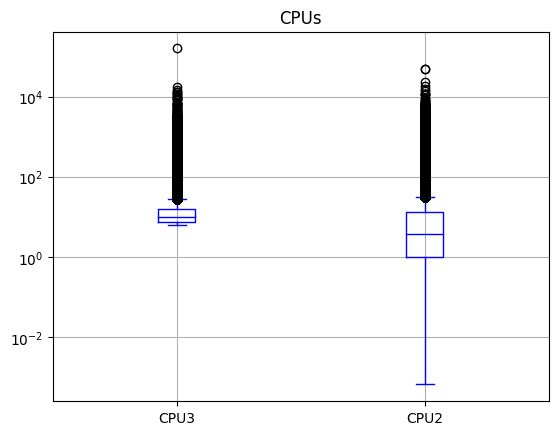

In [158]:
df[['CPU3','CPU2']].boxplot(color='blue')
plt.title('CPUs')
plt.yscale('log')
plt.show()



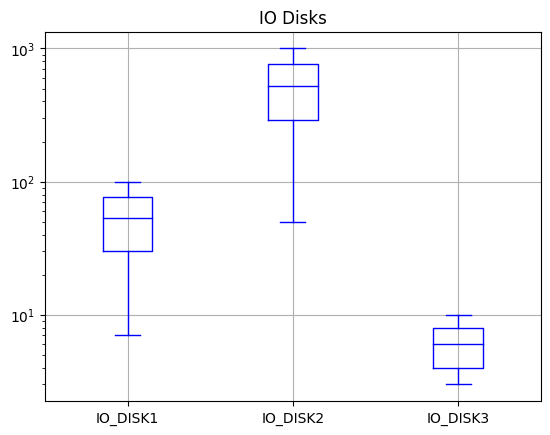

In [159]:
df[['IO_DISK1','IO_DISK2','IO_DISK3']].boxplot(color='blue')
plt.title('IO Disks')
plt.yscale('log')
plt.show()


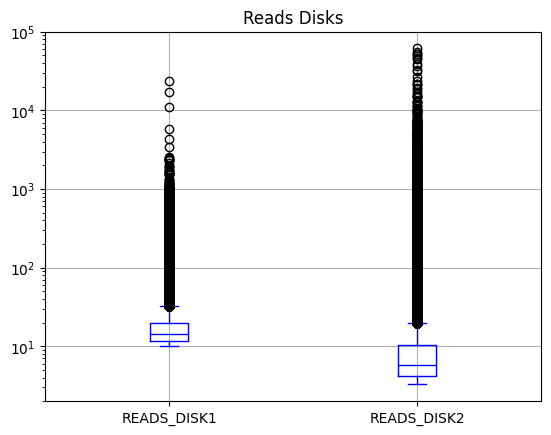

In [160]:
df[['READS_DISK1','READS_DISK2']].boxplot(color='blue')
plt.title('Reads Disks')
plt.yscale('log')
plt.show()

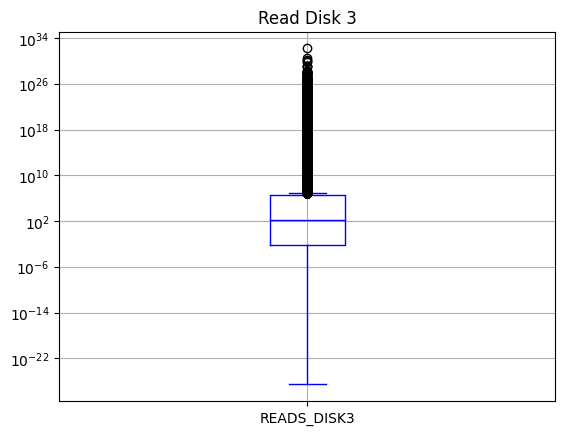

In [161]:
df[['READS_DISK3']].boxplot(color='blue')
plt.title('Read Disk 3')
plt.yscale('log')
plt.show()

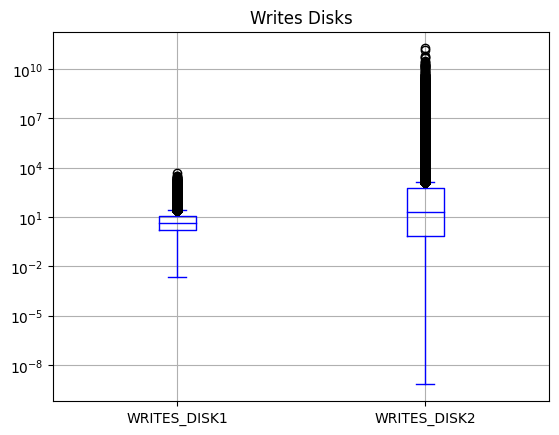

In [162]:
df[['WRITES_DISK1','WRITES_DISK2']].boxplot(color='blue')
plt.title('Writes Disks')
plt.yscale('log')
plt.show()

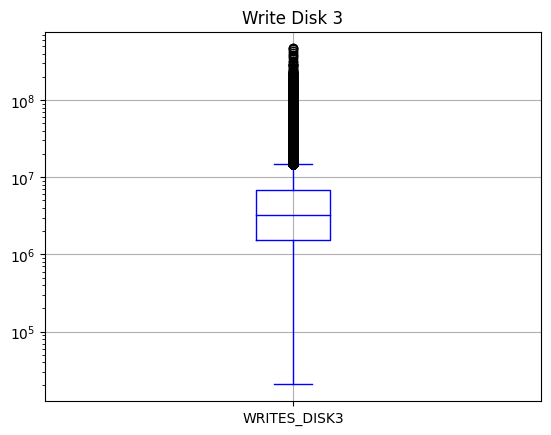

In [163]:
df[['WRITES_DISK3']].boxplot(color='blue')
plt.title('Write Disk 3')
plt.yscale('log')
plt.show()

**Histogramas : mostram a frequência de valores de CPU e discos:**

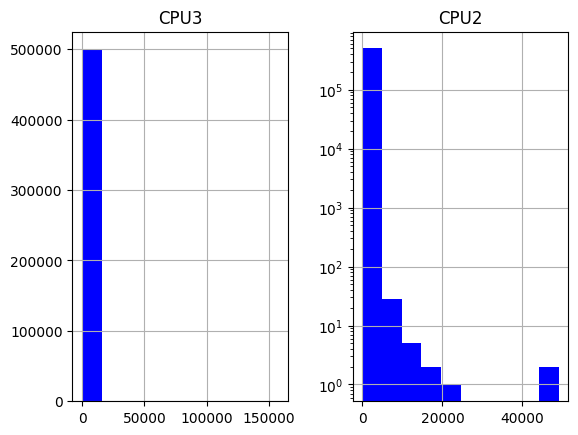

In [164]:
df[['CPU3','CPU2']].hist(color='blue')
plt.yscale('log')
plt.show()



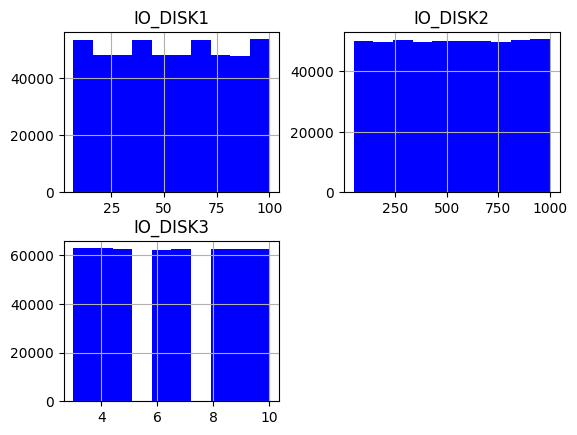

In [165]:
df[['IO_DISK1','IO_DISK2','IO_DISK3']].hist(color='blue')

plt.yscale('log')
plt.show()


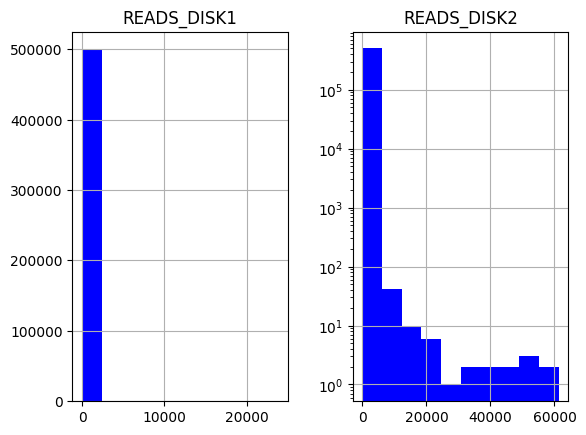

In [166]:
df[['READS_DISK1','READS_DISK2']].hist(color='blue')

plt.yscale('log')
plt.show()

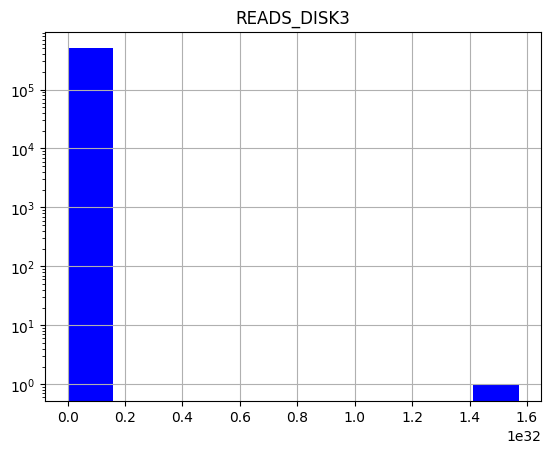

In [167]:
df[['READS_DISK3']].hist(color='blue')
plt.yscale('log')
plt.show()

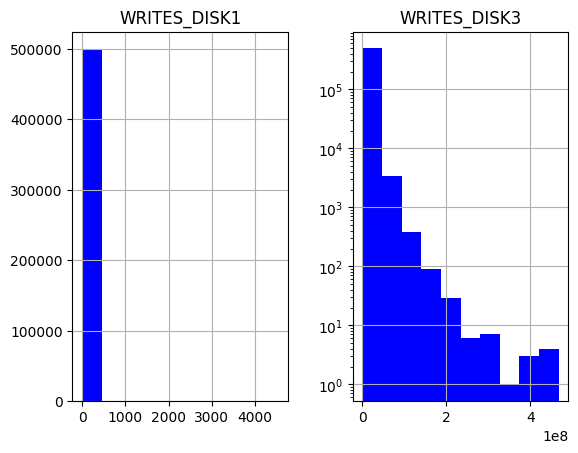

In [168]:
df[['WRITES_DISK1','WRITES_DISK3']].hist(color='blue')
plt.yscale('log')
plt.show()

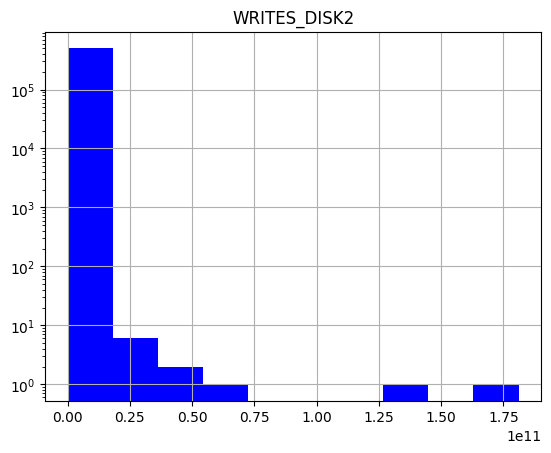

In [169]:
df[['WRITES_DISK2']].hist(color='blue')
plt.yscale('log')
plt.show()

**Ranking das variáveis :**

atribuída a um ranking a cada valor na coluna 'CPU' do DataFrame df. Cada valor de CPU recebe uma classificação baseada em sua ordem relativa. Em seguida, ele gera um gráfico mostrando a relação entre os valores de CPU e seu ranking percentual acumulado, o que ajuda a entender como os valores de CPU estão distribuídos em termos de frequência e percentis.

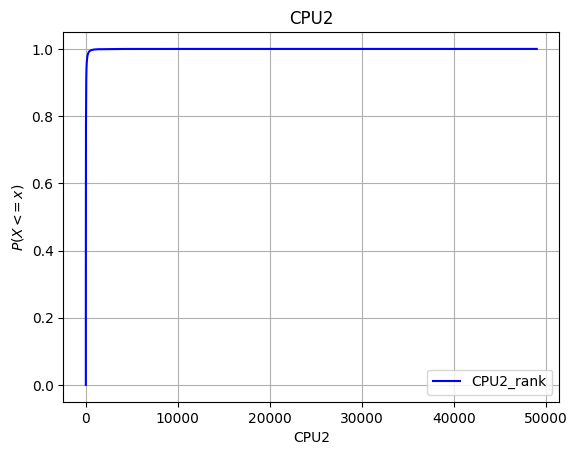

In [170]:
df['CPU2_rank'] = df['CPU2'].rank(method = 'average', pct = True)
df.sort_values('CPU2').plot(x = 'CPU2', y = 'CPU2_rank', grid = True,
                           color='blue')
plt.title('CPU2')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

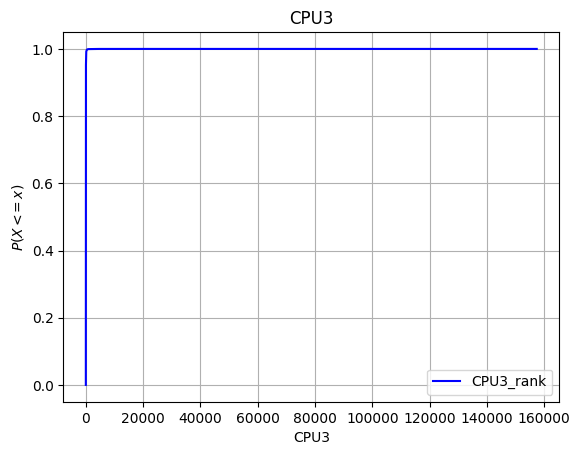

In [171]:
df['CPU3_rank'] = df['CPU3'].rank(method = 'average', pct = True)
df.sort_values('CPU3').plot(x = 'CPU3', y = 'CPU3_rank', grid = True,
                           color='blue')
plt.title('CPU3')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

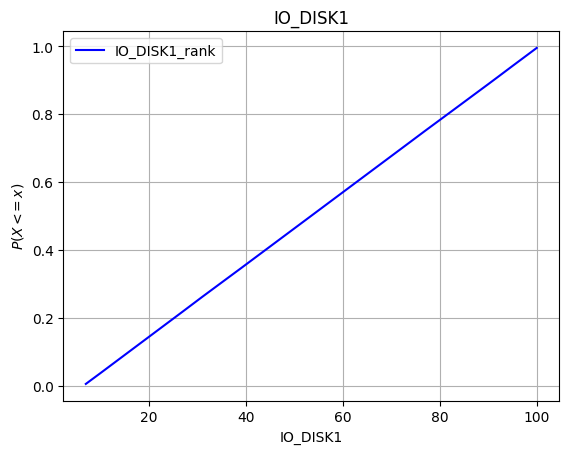

In [172]:
df['IO_DISK1_rank'] = df['IO_DISK1'].rank(method = 'average', pct = True)
df.sort_values('IO_DISK1').plot(x = 'IO_DISK1', y = 'IO_DISK1_rank', grid = True,
                           color='blue')
plt.title('IO_DISK1')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

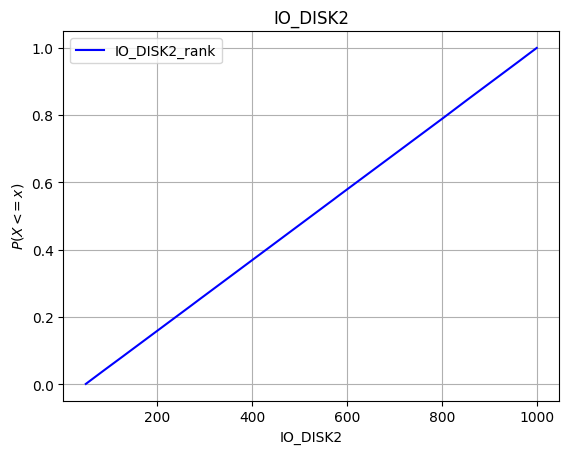

In [173]:
df['IO_DISK2_rank'] = df['IO_DISK2'].rank(method = 'average', pct = True)
df.sort_values('IO_DISK2').plot(x = 'IO_DISK2', y = 'IO_DISK2_rank', grid = True,
                           color='blue')
plt.title('IO_DISK2')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

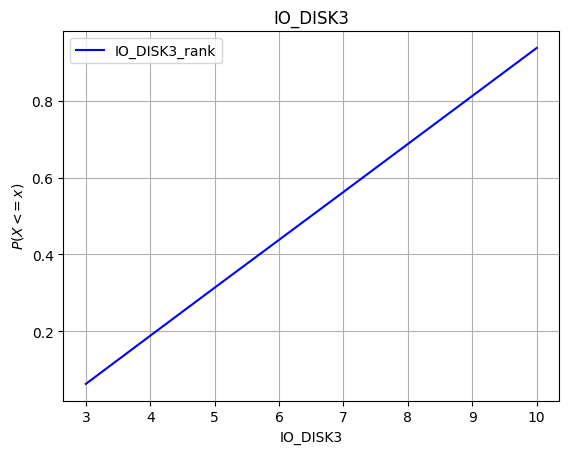

In [174]:
df['IO_DISK3_rank'] = df['IO_DISK3'].rank(method = 'average', pct = True)
df.sort_values('IO_DISK3').plot(x = 'IO_DISK3', y = 'IO_DISK3_rank', grid = True,
                           color='blue')
plt.title('IO_DISK3')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

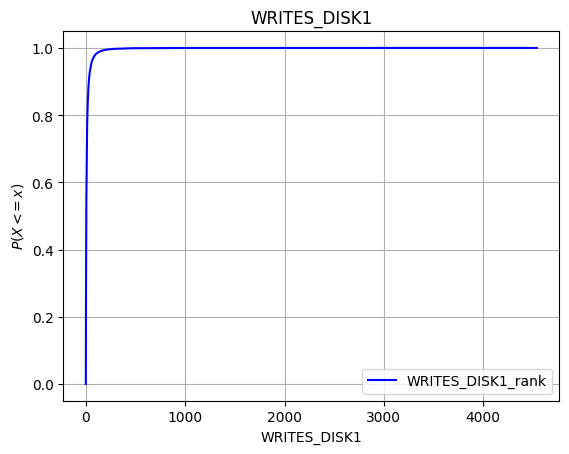

In [175]:
df['WRITES_DISK1_rank'] = df['WRITES_DISK1'].rank(method = 'average', pct = True)
df.sort_values('WRITES_DISK1').plot(x = 'WRITES_DISK1', y = 'WRITES_DISK1_rank', grid = True,
                           color='blue')
plt.title('WRITES_DISK1')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

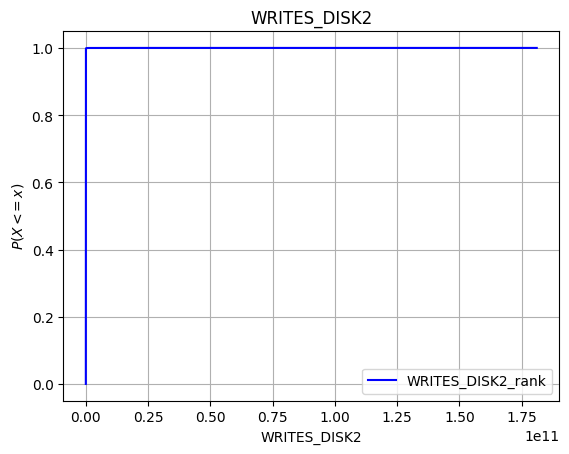

In [176]:
df['WRITES_DISK2_rank'] = df['WRITES_DISK2'].rank(method = 'average', pct = True)
df.sort_values('WRITES_DISK2').plot(x = 'WRITES_DISK2', y = 'WRITES_DISK2_rank', grid = True,
                           color='blue')
plt.title('WRITES_DISK2')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

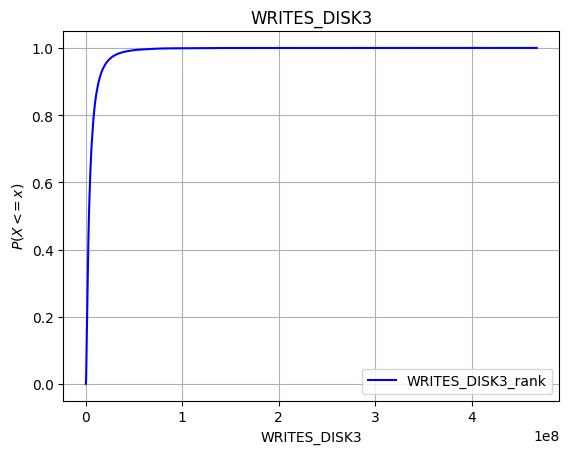

In [177]:
df['WRITES_DISK3_rank'] = df['WRITES_DISK3'].rank(method = 'average', pct = True)
df.sort_values('WRITES_DISK3').plot(x = 'WRITES_DISK3', y = 'WRITES_DISK3_rank', grid = True,
                           color='blue')
plt.title('WRITES_DISK3')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

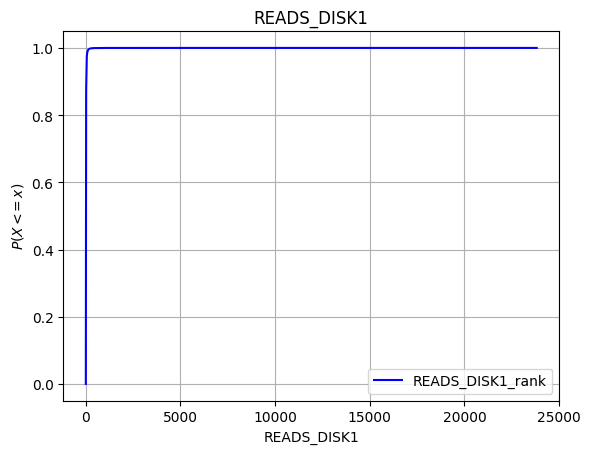

In [178]:
df['READS_DISK1_rank'] = df['READS_DISK1'].rank(method = 'average', pct = True)
df.sort_values('READS_DISK1').plot(x = 'READS_DISK1', y = 'READS_DISK1_rank', grid = True,
                           color='blue')
plt.title('READS_DISK1')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

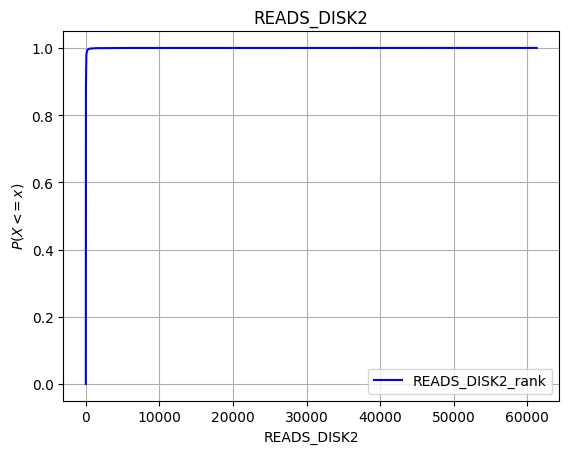

In [179]:
df['READS_DISK2_rank'] = df['READS_DISK2'].rank(method = 'average', pct = True)
df.sort_values('READS_DISK2').plot(x = 'READS_DISK2', y = 'READS_DISK2_rank', grid = True,
                           color='blue')
plt.title('READS_DISK2')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

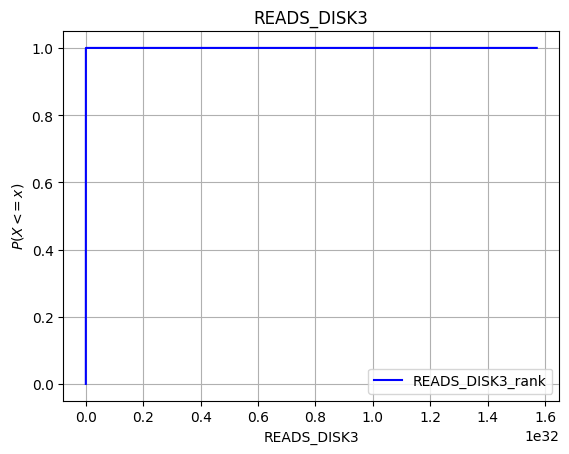

In [180]:
df['READS_DISK3_rank'] = df['READS_DISK3'].rank(method = 'average', pct = True)
df.sort_values('READS_DISK3').plot(x = 'READS_DISK3', y = 'READS_DISK3_rank', grid = True,
                           color='blue')
plt.title('READS_DISK3')
plt.ylabel(r"$P(X <\!\!= x)$")
plt.draw()

 **Geração de um gráfico de dispersão (gráfico de dispersão)**

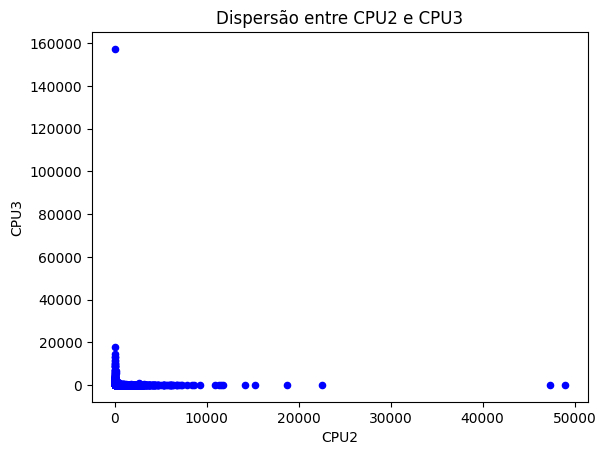

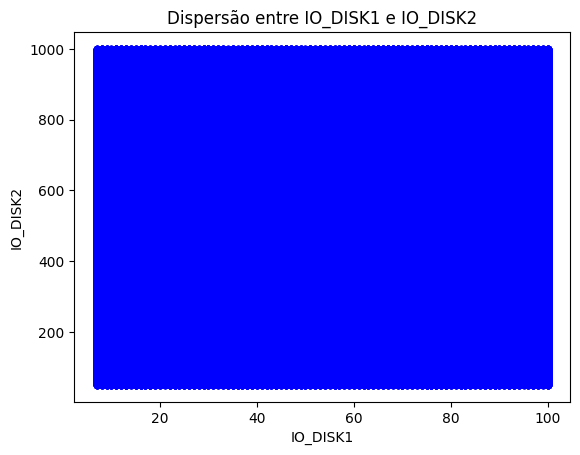

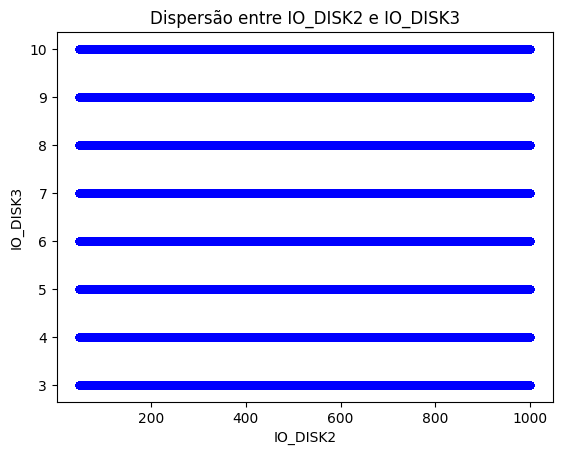

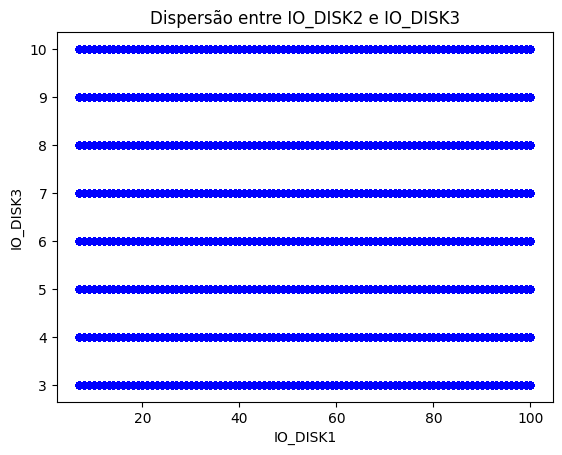

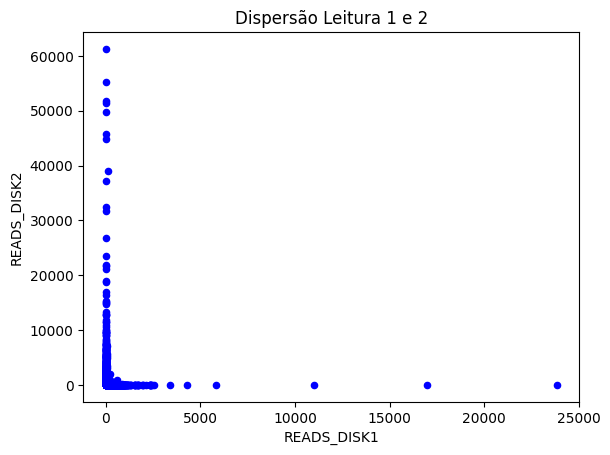

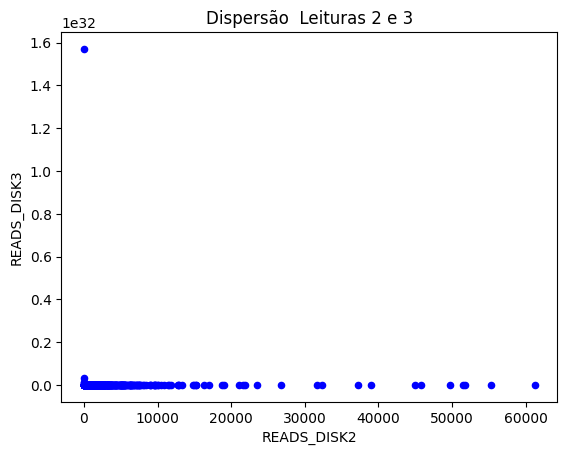

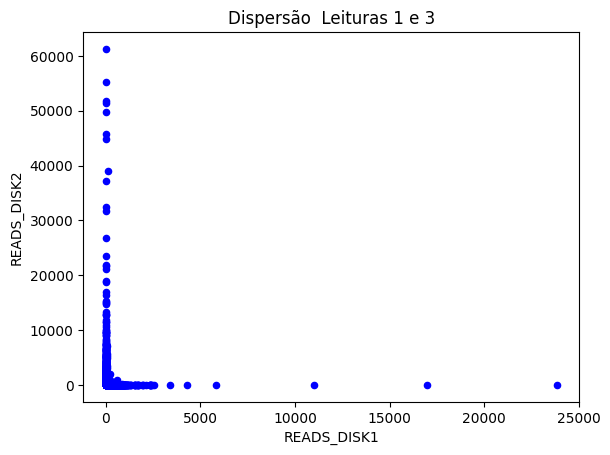

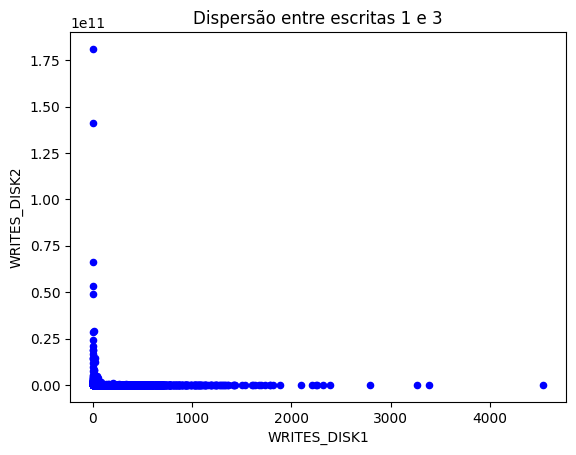

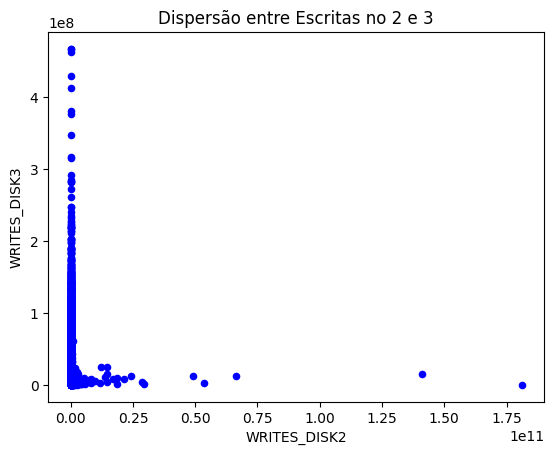

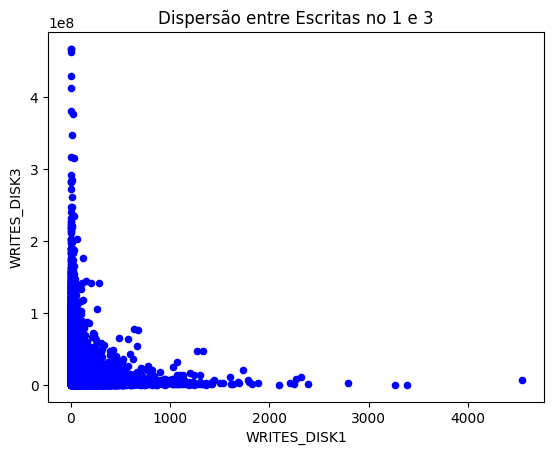

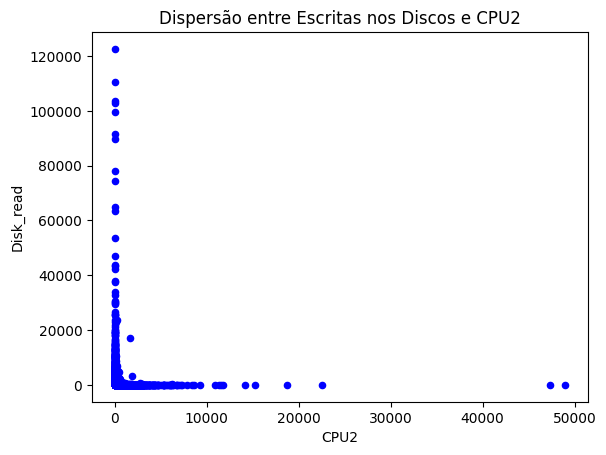

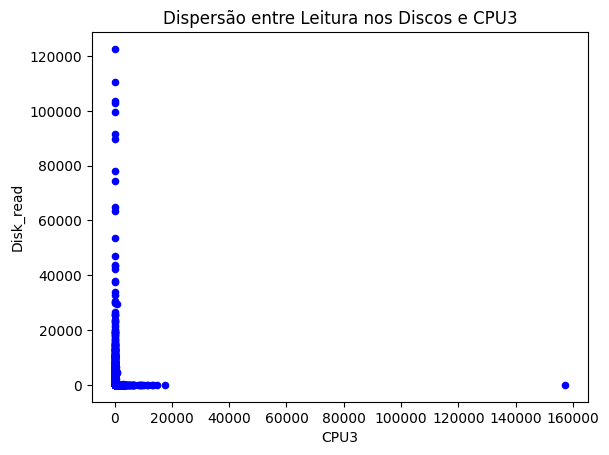

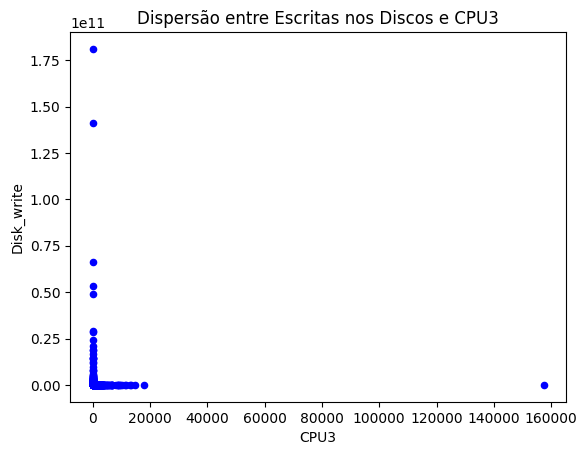

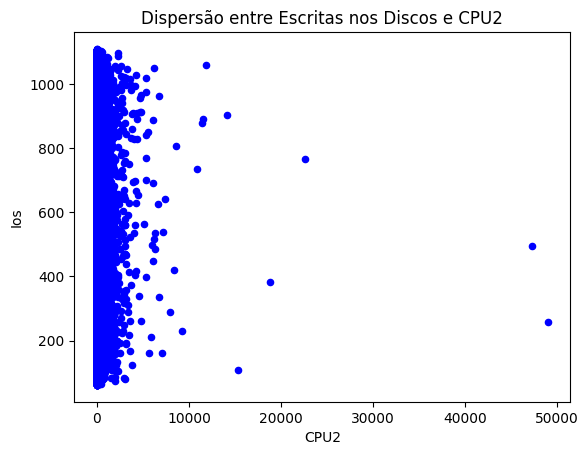

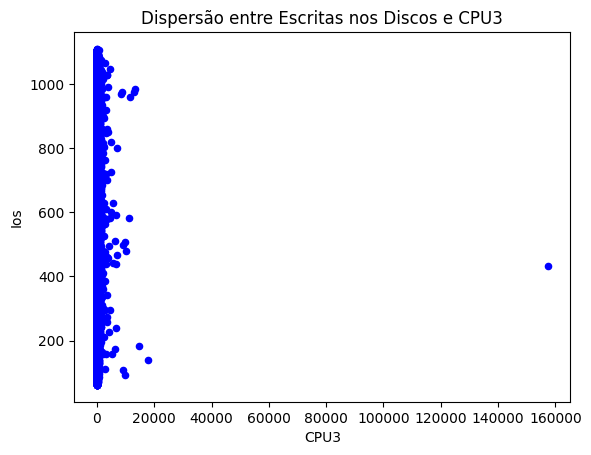

In [181]:
# Dispersão entre CPU2 e CPU3
df.plot.scatter(x='CPU2', y='CPU3', color='blue')
plt.title('Dispersão entre CPU2 e CPU3')
plt.show()

# Dispersão entre IO_DISK1 e IO_DISK2
df.plot.scatter(x='IO_DISK1', y='IO_DISK2', color='blue')
plt.title('Dispersão entre IO_DISK1 e IO_DISK2')
plt.show()

# Dispersão entre IO_DISK2 e IO_DISK3
df.plot.scatter(x='IO_DISK2', y='IO_DISK3', color='blue')
plt.title('Dispersão entre IO_DISK2 e IO_DISK3')
plt.show()

# Dispersão entre IO_DISK1 e IO_DISK3
df.plot.scatter(x='IO_DISK1', y='IO_DISK3', color='blue')
plt.title('Dispersão entre IO_DISK2 e IO_DISK3')
plt.show()

# Dispersão entre READS_DISK1 e WRITES_DISK1
#df.plot.scatter(x='READS_DISK1', y='WRITES_DISK1', color='blue')
#plt.title('Dispersão entre Leituras e Escritas no Disco 1')
#plt.show()

# Dispersão entre READS_DISK2 e WRITES_DISK2
#df.plot.scatter(x='READS_DISK2', y='WRITES_DISK2', color='blue')
#plt.title('Dispersão entre Leituras e Escritas no Disco 2')
#plt.show()

# Dispersão entre READS_DISK3 e WRITES_DISK3
#df.plot.scatter(x='READS_DISK3', y='WRITES_DISK3', color='blue')
#plt.title('Dispersão entre Leituras e Escritas no Disco 3')
#plt.show()


# Dispersão entre READS_DISK1 e READS_DISK2
df.plot.scatter(x='READS_DISK1', y='READS_DISK2', color='blue')
plt.title('Dispersão Leitura 1 e 2')
plt.show()

# Dispersão entre READS_DISK2 e READS_DISK3
df.plot.scatter(x='READS_DISK2', y='READS_DISK3', color='blue')
plt.title('Dispersão  Leituras 2 e 3')
plt.show()

# Dispersão entre READS_DISK1 e READS_DISK3
df.plot.scatter(x='READS_DISK1', y='READS_DISK2', color='blue')
plt.title('Dispersão  Leituras 1 e 3')
plt.show()


# Dispersão entre WRITES_DISK2 e WRITES_DISK2
df.plot.scatter(x='WRITES_DISK1', y='WRITES_DISK2', color='blue')
plt.title('Dispersão entre escritas 1 e 3')
plt.show()


# Dispersão entre WRITES_DISK3 e WRITES_DISK3
df.plot.scatter(x='WRITES_DISK2', y='WRITES_DISK3', color='blue')
plt.title('Dispersão entre Escritas no 2 e 3')
plt.show()

# Dispersão entre WRITES_DISK1 e WRITES_DISK3
df.plot.scatter(x='WRITES_DISK1', y='WRITES_DISK3', color='blue')
plt.title('Dispersão entre Escritas no 1 e 3')
plt.show()


#Disperção entre a CPU e os discos de leitura
df['Disk_read']=df['READS_DISK1']+df['READS_DISK2']+df['READS_DISK2']
df.plot.scatter(x='CPU2', y='Disk_read', color='blue')
plt.title('Dispersão entre Escritas nos Discos e CPU2')
plt.show()
#Disperção entre a CPU e os discos de leitura
df['Disk_read']=df['READS_DISK1']+df['READS_DISK2']+df['READS_DISK2']
df.plot.scatter(x='CPU3', y='Disk_read', color='blue')
plt.title('Dispersão entre Leitura nos Discos e CPU3')
plt.show()
#Disperção entre a CPU e os discos de leitura
df['Disk_write']=df['WRITES_DISK1']+df['WRITES_DISK2']+df['WRITES_DISK3']
df.plot.scatter(x='CPU3', y='Disk_write', color='blue')
plt.title('Dispersão entre Escritas nos Discos e CPU3')
plt.show()
#Disperção entre a CPU e os Ios
df['Ios']=df['IO_DISK1']+df['IO_DISK2']+df['IO_DISK3']
df.plot.scatter(x='CPU2', y='Ios', color='blue')
plt.title('Dispersão entre Escritas nos Discos e CPU2')
plt.show()

#Disperção entre a CPU e os Ios
df['Ios']=df['IO_DISK1']+df['IO_DISK2']+df['IO_DISK3']
df.plot.scatter(x='CPU3', y='Ios', color='blue')
plt.title('Dispersão entre Escritas nos Discos e CPU3')
plt.show()

O código acima gera gráficos de dispersão comparando pares de variáveis que fazem sentido, como CPU2 e CPU3, IO_DISK1 e IO_DISK2, entre outros.

**C)**

---



Com base nas informações acima obtidas dos gráficos de dispersão, histogramas, CDFs e box plots, pude avaliar que os dados precisam de transformações para melhorar sua distribuição ou facilitar futuras análises.
Essa conclusão se da por:

Algumas variáveis, como a CPU2 e a CPU3, e as operações de I/O dos discos, mostram distribuições assimétricas. Essas assimetrias podem indicar que a maioria dos registros está concentrada em uma faixa de valores baixa, enquanto poucos registros possuem valores muito altos.
Esse aspectro podesignificar a presença de outliers (Tambem observada nos em alguns box plots) sugerem que os dados não seguem uma distribuição normal. Isso pode impactar negativamente análises que assumem normalidade, como regressões lineares ou análises estatísticas.
As funções de distribuição cumulativa (CDFs) mostram concentrações significativas de dados isso pode indicar que os dados não estão distribuídos uniformemente.

Com isso concluo que, sim, há necessidade de realizar transformações nos dados para normalizar as distribuições assimétricas e melhorar a análise e visualização dos dados.

**Bonus:**
O codigo abaixo realiza algumas analises e me ajuda a decidir se os dados necessitam ou não da transformação de dados.*Tambem utilizei no trabalho*

In [182]:
# Verificando a assimetria (skewness)
skewness = df[['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3', 'READS_DISK1', 'READS_DISK2', 'READS_DISK3', 'WRITES_DISK1', 'WRITES_DISK2', 'WRITES_DISK3']].skew()
print("Skewness (Assimetria):\n", skewness)

# Verificando a presença de outliers usando o IQR (Intervalo Interquartil)
Q1 = df[['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3', 'READS_DISK1', 'READS_DISK2', 'READS_DISK3', 'WRITES_DISK1', 'WRITES_DISK2', 'WRITES_DISK3']].quantile(0.25)
Q3 = df[['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3', 'READS_DISK1', 'READS_DISK2', 'READS_DISK3', 'WRITES_DISK1', 'WRITES_DISK2', 'WRITES_DISK3']].quantile(0.75)
IQR = Q3 - Q1

# Contar quantos pontos estão fora de 1.5 vezes o IQR (outliers)
# Select only the columns used to calculate IQR
outliers = ((df[['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3', 'READS_DISK1', 'READS_DISK2', 'READS_DISK3', 'WRITES_DISK1', 'WRITES_DISK2', 'WRITES_DISK3']] < (Q1 - 1.5 * IQR)) | (df[['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3', 'READS_DISK1', 'READS_DISK2', 'READS_DISK3', 'WRITES_DISK1', 'WRITES_DISK2', 'WRITES_DISK3']] > (Q3 + 1.5 * IQR))).sum()
print("Outliers detectados:\n", outliers)

Skewness (Assimetria):
 CPU3            583.814731
CPU2            148.555735
IO_DISK1          0.002322
IO_DISK2         -0.001384
IO_DISK3          0.000644
READS_DISK1     266.353701
READS_DISK2     138.244998
READS_DISK3     706.549332
WRITES_DISK1     20.284660
WRITES_DISK2    375.972005
WRITES_DISK3      7.545667
dtype: float64
Outliers detectados:
 CPU3             52873
CPU2             64303
IO_DISK1             0
IO_DISK2             0
IO_DISK3             0
READS_DISK1      46923
READS_DISK2      57836
READS_DISK3     115469
WRITES_DISK1     54099
WRITES_DISK2     97822
WRITES_DISK3     42194
dtype: int64


**D)**


---



**Sim**, em minha analise noto que o mais recomendado seria a remoção de outliers da minha base devido ao impacto que eles podem ter nas análises. **No entanto, não posso remove-los**, pois não temos contexto suficiente sobre as informações que esses outliers representam. Eles podem conter dados relevantes sobre momentos críticos de carga no servidor ou eventos excepcionais que são importantes para o conjunto de dados. **Portanto não removo os outilirs por esse motivo..**

**E)**

**Análise de correlação :**

Correlação de Pearson e Spearman : calcula as correlações entre os dispositivos usando as correlações de Pearson e Spearman:
 coeficientes de Pearson e Spearman , pode fornecer informações valiosas sobre as relações lineares e não lineares entre variáveis, como o uso de CPU e os discos . Uma análise de esclarecimento é útil para entender se há padrões de comportamento sincronizados entre o uso da CPU e dos discos, algo que pode complementar a clusterização e o PCA.

In [183]:
df[['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3','READS_DISK1', 'READS_DISK2', 'READS_DISK3','WRITES_DISK1', 'WRITES_DISK2', 'WRITES_DISK3']].corr('pearson')

,CPU3,CPU2,IO_DISK1,IO_DISK2,IO_DISK3,READS_DISK1,READS_DISK2,READS_DISK3,WRITES_DISK1,WRITES_DISK2,WRITES_DISK3
CPU3,1.000000,-0.000263,0.000049,-0.001082,-0.002029,0.000203,0.000368,-0.000005,-0.000508,-0.000088,-0.001106
CPU2,-0.000263,1.000000,0.000278,0.000364,-0.000830,0.008194,-0.000744,-0.000148,0.000649,0.000333,0.001722
IO_DISK1,0.000049,0.000278,1.000000,-0.001877,0.000391,-0.000331,-0.001287,0.000674,0.001536,0.001781,-0.000816
IO_DISK2,-0.001082,0.000364,-0.001877,1.000000,-0.000462,0.000504,0.001090,0.000102,-0.000850,-0.000540,-0.000656
IO_DISK3,-0.002029,-0.000830,0.000391,-0.000462,1.000000,0.000976,-0.000965,-0.000960,-0.000006,0.000831,0.000968
READS_DISK1,0.000203,0.008194,-0.000331,0.000504,0.000976,1.000000,0.000091,0.000400,0.000165,0.000418,-0.000663
READS_DISK2,0.000368,-0.000744,-0.001287,0.001090,-0.000965,0.000091,1.000000,-0.000077,0.002860,-0.000183,-0.001297
READS_DISK3,-0.000005,-0.000148,0.000674,0.000102,-0.000960,0.000400,-0.000077,1.000000,-0.000410,-0.000009,-0.000601
WRITES_DISK1,-0.000508,0.000649,0.001536,-0.000850,-0.000006,0.000165,0.002860,-0.000410,1.000000,-0.001023,-0.001820
WRITES_DISK2,-0.000088,0.000333,0.001781,-0.000540,0.000831,0.000418,-0.000183,-0.000009,-0.001023,1.000000,0.000726


Avalia a força da relação linear entre as variáveis. Isso é útil para entender o uso da CPU e como as operações de disco aumentam ou diminuem juntas de maneira linear.

In [184]:
df[['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3','READS_DISK1', 'READS_DISK2', 'READS_DISK3','WRITES_DISK1', 'WRITES_DISK2', 'WRITES_DISK3']].corr('spearman')

,CPU3,CPU2,IO_DISK1,IO_DISK2,IO_DISK3,READS_DISK1,READS_DISK2,READS_DISK3,WRITES_DISK1,WRITES_DISK2,WRITES_DISK3
CPU3,1.000000,0.001312,0.000016,-0.001252,-0.001226,0.001581,-0.000384,-0.001431,0.000249,0.002854,-0.000537
CPU2,0.001312,1.000000,0.000300,0.002436,-0.002362,0.001130,0.000679,-0.000138,-0.000093,0.001141,-0.001359
IO_DISK1,0.000016,0.000300,1.000000,-0.001878,0.000391,0.000901,0.000457,0.000766,-0.002657,0.000539,-0.000378
IO_DISK2,-0.001252,0.002436,-0.001878,1.000000,-0.000463,-0.000084,-0.000380,-0.000163,-0.000066,0.001558,-0.000299
IO_DISK3,-0.001226,-0.002362,0.000391,-0.000463,1.000000,0.001808,-0.004125,0.001104,0.000233,-0.002481,0.001993
READS_DISK1,0.001581,0.001130,0.000901,-0.000084,0.001808,1.000000,0.001343,0.000340,-0.001483,-0.002065,0.000204
READS_DISK2,-0.000384,0.000679,0.000457,-0.000380,-0.004125,0.001343,1.000000,0.001288,-0.000283,-0.000391,0.000250
READS_DISK3,-0.001431,-0.000138,0.000766,-0.000163,0.001104,0.000340,0.001288,1.000000,-0.001405,-0.001644,-0.003324
WRITES_DISK1,0.000249,-0.000093,-0.002657,-0.000066,0.000233,-0.001483,-0.000283,-0.001405,1.000000,-0.001658,-0.000521
WRITES_DISK2,0.002854,0.001141,0.000539,0.001558,-0.002481,-0.002065,-0.000391,-0.001644,-0.001658,1.000000,-0.000863


Avalia a relação monótona entre as variáveis, sendo mais robusta contra outliers. Isso pode ser especialmente relevante aqui, visto que identificamos outliers significativos em algumas variáveis ​​(como uso de disco).

**Mapa de calor : visualização da matriz de brilho:**

<Axes: >

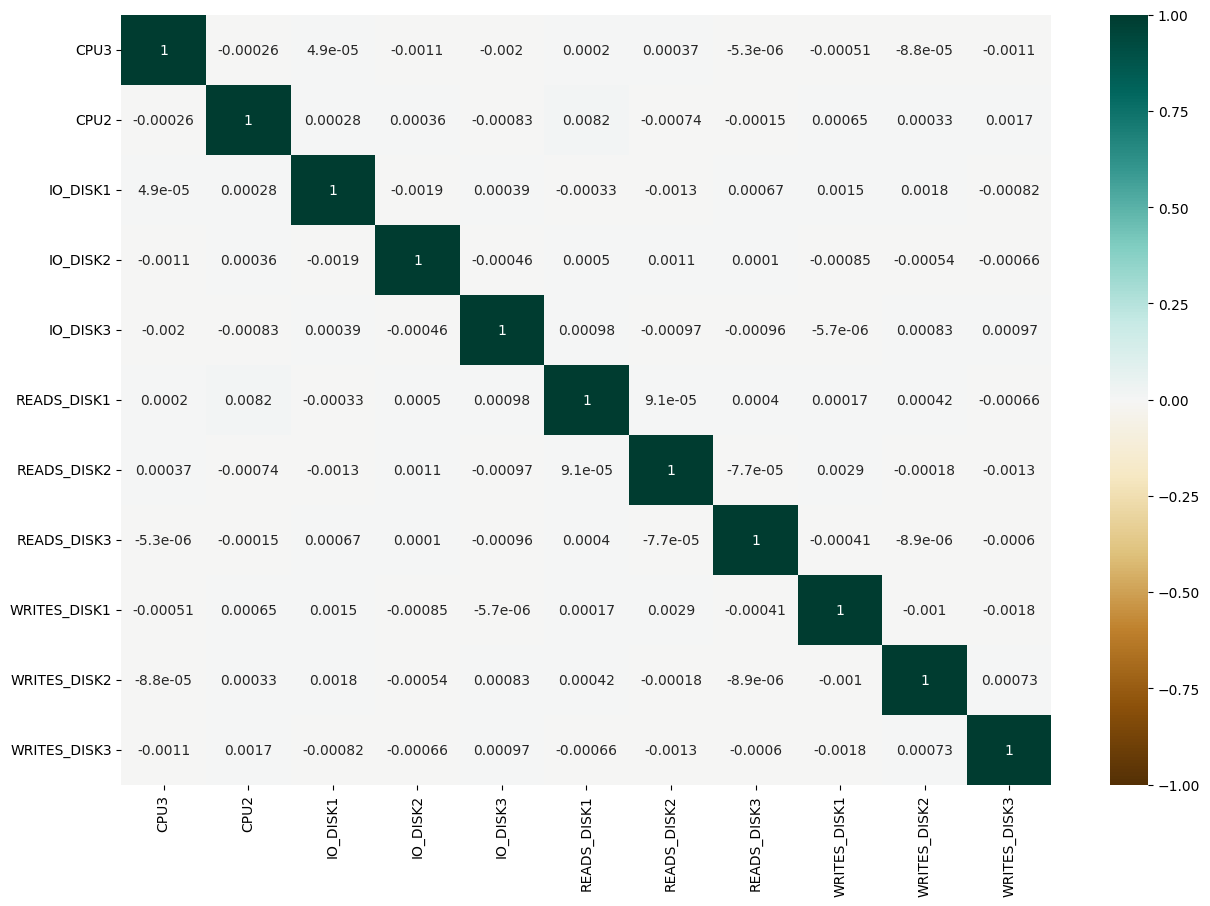

In [185]:
#['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3','READS_DISK1', 'READS_DISK2', 'READS_DISK3','WRITES_DISK1', 'WRITES_DISK2', 'WRITES_DISK3']
mask = np.triu(np.ones_like(df[['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3','READS_DISK1', 'READS_DISK2', 'READS_DISK3','WRITES_DISK1', 'WRITES_DISK2', 'WRITES_DISK3']].corr(),
                            dtype=bool))
plt.figure(figsize=(15, 10))
sns.heatmap(df[['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3','READS_DISK1', 'READS_DISK2', 'READS_DISK3','WRITES_DISK1', 'WRITES_DISK2', 'WRITES_DISK3']].corr(), mask=None,
            cmap='BrBG', vmin=-1, vmax=1, annot=True)

**Análise de Componentes Principais (PCA) :**

In [210]:
# Criar novas colunas agregando as variáveis de CPU e IOs
df['CPU_Total'] = df['CPU2'] + df['CPU3']
df['IO_Total'] = df['IO_DISK1'] + df['IO_DISK2'] + df['IO_DISK3']
df['Total_Reads'] = df['READS_DISK1'] + df['READS_DISK2'] + df['READS_DISK3']
df['Total_Writes'] = df['WRITES_DISK1'] + df['WRITES_DISK2'] + df['WRITES_DISK3']

# Aplicar PCA nas novas colunas agregadas
#pca = PCA(n_components=4)
#X_pca = pca.fit_transform(df[['CPU_Total', 'IO_Total', 'Total_Reads', 'Total_Writes']])

# Aplicar PCA nas novas colunas agregadas
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[['CPU_Total', 'IO_Total']])


O PCA é utilizado para reduzir a dimensionalidade dos dados e entender as principais fontes de variação. Cálculo da variação explicada por cada componente principal, sendo o primeiro componente o mais relevante.
Escolhi gerar para as duas componentes principais para uma melhor visualização dos dados

In [211]:
# Variância explicada pelos componentes principais
explained_variance = np.cumsum(pca.explained_variance_ratio_)
print("Variância Explicada Acumulada:", explained_variance)


Variância Explicada Acumulada: [0.51262192 1.        ]


O código calcula a soma cumulativa da variância explicada pelos componentes principais, permitindo que você veja como a variância dos dados é distribuída entre os componentes. Isso é útil para entender quantos componentes principais são necessários para explicar uma quantidade significativa da variação

**visualização da variância explicada**

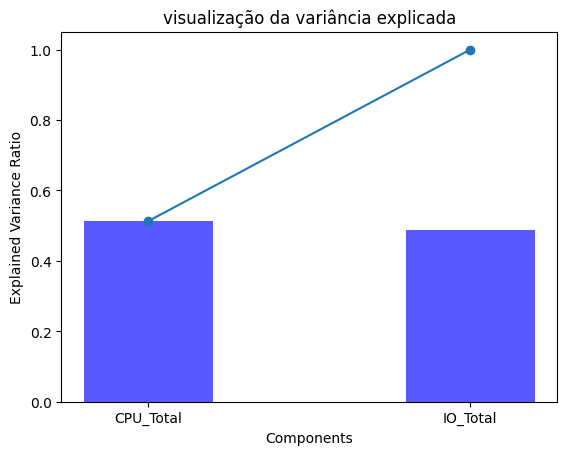

In [212]:
#components=['CPU_Total', 'IO_Total', 'Total_Reads', 'Total_Writes']
components=['CPU_Total', 'IO_Total']
explain_var_cum=np.cumsum(pca.explained_variance_ratio_)
plt.plot(components, explain_var_cum, marker='o')
plt.bar(components, pca.explained_variance_ratio_, color ='blue',
         width = 0.4, alpha=0.65)
plt.title('visualização da variância explicada')
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.draw()

Ele cria dois gráficos: Gráfico de linha mostrando a variância explicada acumulada pelos componentes principais. Isso ajuda a visualizar quantos componentes principais são necessários para explicar uma proporção significativa da variação nos dados. Gráfico de barras mostrando a variação explicada individualmente para cada componente . Isso ajuda a entender a contribuição de cada componente para a variação total. Esses gráficos permitem avaliar se é necessário usar todos os componentes principais ou se um número limitado de componentes já captura a maior parte da variação nos dados. A linha vermelha representa a soma da variação explicada. As barras representam o percentual da vaariação explicada para cada um dos componentes. O componente principal 1 (PC1) representa quase 50% da variação explicada. Observação: o gráfico de dispersão a seguir é construído a partir dos dois primeiros componentes, PC1 e PC2 que representam quase 100% dos dados, veja que o eixo 'x' apresenta um range de valores uma ordem de grandeza maior do que o PC2.

**gráfico de dispersão (gráfico de dispersão) para visualizar os dados transformados após a aplicação de Análise de Componentes Principais (PCA)**

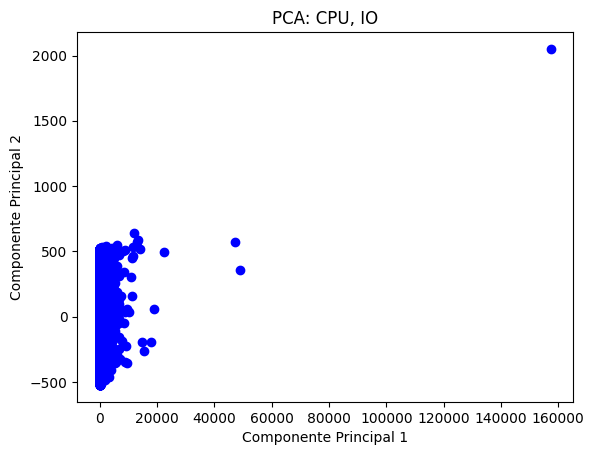

In [213]:
# Gráfico de dispersão para os componentes principais
plt.scatter(X_pca[:, 0], X_pca[:, 1], color='blue')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA: CPU, IO')
plt.show()


**Gráfico de dispersão para visualizar as cargas dos componentes principais**

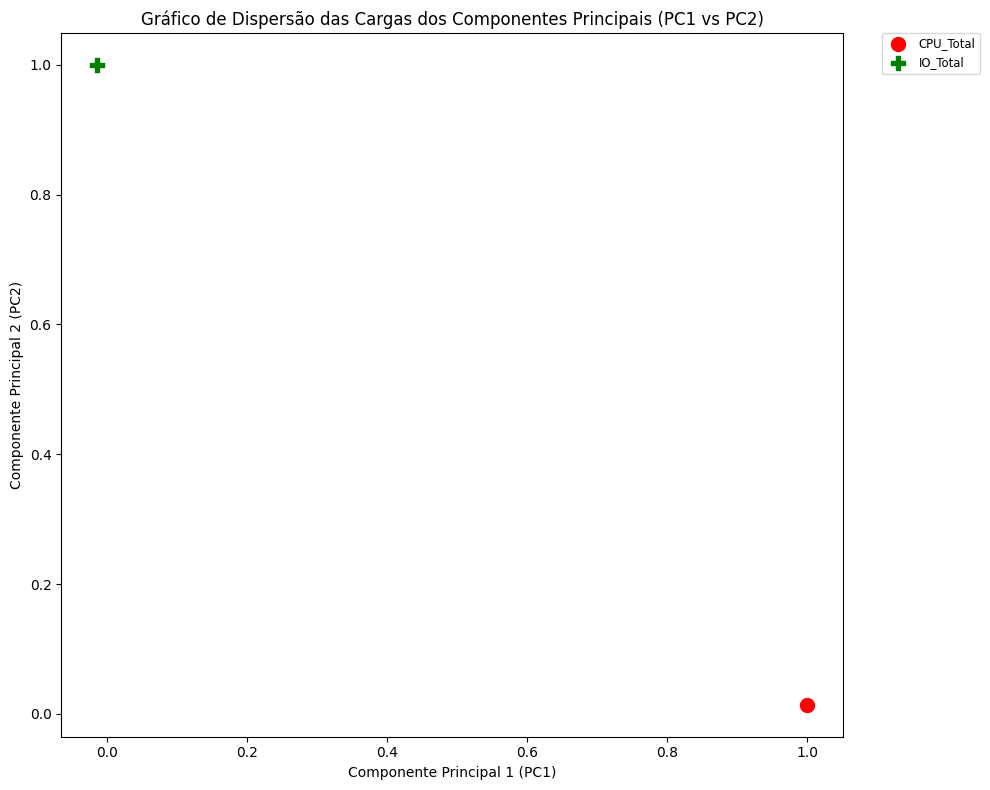

In [215]:
# Transforma os componentes principais para PC1 e PC2
x_values = pca.components_.T[:, 0]
y_values = pca.components_.T[:, 1]

# Listas de markers e colors para 11 labels
markers = ['o', 'P', 'D', '^', 's', '*', 'h', 'v', 'x', '>', '<']  # 11 marcadores
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'brown', 'pink']  # 11 cores
labels = ['CPU_Total', 'IO_Total', 'Total_Reads', 'Total_Writes']

# Adicionar rótulos para os eixos
plt.figure(figsize=(10, 8))  # Aumentar o tamanho do gráfico para melhor visualização
plt.xlabel('Componente Principal 1 (PC1)')
plt.ylabel('Componente Principal 2 (PC2)')

# Criar gráfico de dispersão para os componentes principais com marcadores e cores
for i in range(len(x_values)):
    plt.scatter(x_values[i], y_values[i], marker=markers[i], color=colors[i], label=labels[i], s=100)

# Adicionar legenda com tamanho ajustado para melhorar a leitura
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='small')

# Adicionar título ao gráfico
plt.title('Gráfico de Dispersão das Cargas dos Componentes Principais (PC1 vs PC2)')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir gráfico
plt.show()



O gráfico de dispersão plota as cargas dos componentes principais (PC1 e PC2) das variáveis agregadas, incluindo CPU_Total, IO_Total. Cada variável agregada é representada por um marcador e uma cor específica, permitindo a visualização da contribuição dessas variáveis nos dois primeiros componentes principais.

A legenda identifica claramente cada variável agregada, permitindo que você veja quais variáveis possuem maior ou menor influência sobre os componentes principais. O gráfico ajuda a interpretar como as variáveis agregadas se relacionam com os componentes principais obtidos na análise de PCA, auxiliando na compreensão dos principais padrões de variabilidade nos dados. O uso de diferentes cores e marcadores facilita a distinção visual entre as variáveis, tornando a análise mais intuitiva.



In [218]:
pca.explained_variance_ratio_


array([0.51262192, 0.48737808])

Retorna a proporção da variância total dos dados que é explicada por cada componente principal após a PCA.

O gráfico de PCA mostra como as variáveis agregadas, como CPU_Total, IO_Total, Total_Reads e Total_Writes, estão distribuídas nos componentes principais (PC1 e PC2). Variáveis que estão próximas entre si no gráfico indicam uma correlação, enquanto aquelas mais distantes apresentam comportamentos diferentes. As variáveis mais afastadas da origem têm maior influência nos componentes principais, revelando as principais fontes de variação nos dados. A proximidade entre CPU e I/O sugere uma correlação, indicando que esses recursos tendem a ser utilizados de maneira sincronizada no sistema. O PCA é eficaz na redução da dimensionalidade dos dados, mantendo as informações essenciais, o que facilita a posterior aplicação de clusterização, como o K-Means, para agrupar transações com padrões de uso semelhantes. Assim, o PCA permite identificar padrões de comportamento no uso de CPU e discos, o que facilita a análise e preparação dos dados para uma clusterização eficiente.

**G)**

**Clusterização K-Means :**

In [221]:
scaler = StandardScaler() # Média 0 e Desvio Padrão 1: N(0,1).
scaler.fit(X_pca)
X_scaler = scaler.transform(X_pca)
X_scaler.mean(axis=0)

array([1.74923687e-17, 7.68758390e-17])

Realiza o escalonamento de dados e aplica o algoritmo de clusterização K-Means para agrupar os dados em 3 clusters com base nos componentes principais.
StandardScaler(): Aplica o escalonamento dos dados para que cada variável tenha média zero e desvio padrão igual a 1 . Isso é necessário porque o algoritmo K-Means é sensível à escala das variáveis.

** Definição do número de clusters e semente estimada :**

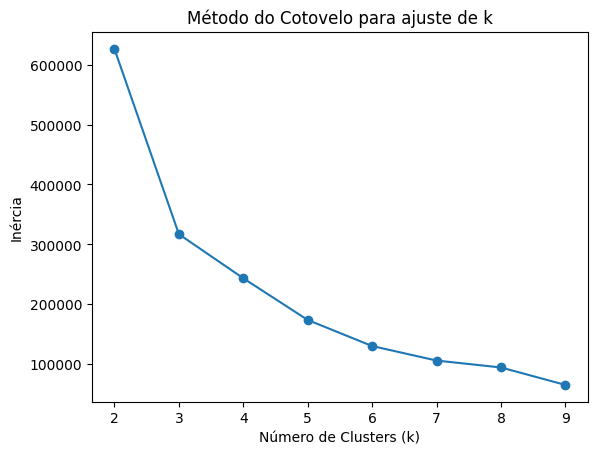

In [227]:
import matplotlib.pyplot as plt

# Lista para armazenar os valores de inércia
inertia = []

# Testando valores de k de 2 a 9
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=rand_number)
    kmeans.fit(X_scaler)
    inertia.append(kmeans.inertia_)  # Adicionando o valor de inércia

# Plotar o gráfico da inércia para visualizar o cotovelo
plt.plot(range(2, 10), inertia, marker='o')
plt.title('Método do Cotovelo para ajuste de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()

De acordo com o codigo acima o melhor k=2

[0 0 1 ... 1 1 0]


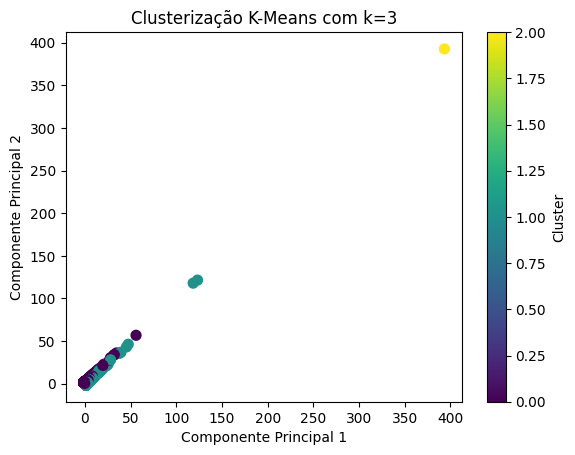

In [248]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import time

# Definindo a semente para a reprodutibilidade
np.random.seed(int(time.time()))

# Normalizando os dados com StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[['CPU_Total', 'IO_Total']])

# Aplicando PCA para reduzir a dimensionalidade para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Definindo o valor de k = 2 para a clusterização K-Means
kmeans = KMeans(n_clusters=3, random_state=np.random.randint(2**8), n_init='auto', max_iter=300)

# Ajustando o modelo aos dados PCA transformados
kmeans.fit(X_pca)

# Rótulos dos clusters
cluster_labels = kmeans.labels_

# Exibindo os resultados da clusterização
print(cluster_labels)

# Plotar os clusters gerados
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title("Clusterização K-Means com k=3")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label='Cluster')
plt.show()


**Obtenção dos rótulos do cluster :**

In [249]:
df['cluster'] = kmeans.labels_
#df['cluster']=cluster_labels
df[['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3']]

,CPU3,CPU2,IO_DISK1,IO_DISK2,IO_DISK3
0,8.919091,104.533151,75,616,7
1,6.352267,1.348326,74,805,10
2,13.267720,0.175701,35,174,5
3,19.119685,100.152888,86,256,4
4,208.729528,2.705195,69,335,6
...,...,...,...,...,...
499995,10.426140,1.090015,33,186,10
499996,53.820380,1.545964,49,614,9
499997,18.700160,5.057935,20,366,7
499998,12.260779,0.742786,14,65,10


In [250]:
df[df.cluster == 0][['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3','cluster']].describe()


,CPU3,CPU2,IO_DISK1,IO_DISK2,IO_DISK3,cluster
count,250399.000000,250399.000000,250399.000000,250399.000000,250399.000000,250399.0
mean,18.511497,22.413182,54.966218,762.147612,6.508548,0.0
std,76.513200,124.493021,27.108279,138.729593,2.294216,0.0
min,6.330044,0.000675,7.000000,476.000000,3.000000,0.0
25%,7.661513,1.034265,32.000000,644.000000,5.000000,0.0
50%,10.046999,3.723076,56.000000,763.000000,7.000000,0.0
75%,15.889694,13.397483,79.000000,882.000000,9.000000,0.0
max,13267.285218,22576.192490,100.000000,1000.000000,10.000000,0.0


In [252]:
df[df.cluster == 1][['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3','cluster']].describe()


,CPU3,CPU2,IO_DISK1,IO_DISK2,IO_DISK3,cluster
count,249600.000000,249600.000000,249600.000000,249600.000000,249600.000000,249600.0
mean,18.800638,22.487820,51.983714,287.945008,6.487324,1.0
std,90.340761,177.979706,27.078525,138.513933,2.292322,0.0
min,6.330003,0.000756,7.000000,50.000000,3.000000,1.0
25%,7.667501,1.017256,28.000000,169.000000,4.000000,1.0
50%,10.053120,3.660984,51.000000,287.000000,6.000000,1.0
75%,15.952701,13.217467,75.000000,406.000000,8.000000,1.0
max,17754.670518,49013.320742,100.000000,573.000000,10.000000,1.0


In [253]:
df[df.cluster == 2][['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3','cluster']].describe()


,CPU3,CPU2,IO_DISK1,IO_DISK2,IO_DISK3,cluster
count,1.000000,1.000000,1.0,1.0,1.0,1.0
mean,157382.735324,6.988102,56.0,372.0,4.0,2.0
std,NaN,NaN,NaN,NaN,NaN,NaN
min,157382.735324,6.988102,56.0,372.0,4.0,2.0
25%,157382.735324,6.988102,56.0,372.0,4.0,2.0
50%,157382.735324,6.988102,56.0,372.0,4.0,2.0
75%,157382.735324,6.988102,56.0,372.0,4.0,2.0
max,157382.735324,6.988102,56.0,372.0,4.0,2.0


In [254]:
# Cálculo do centróide de cada cluster (média)
centroides = df.groupby('cluster')[['CPU3', 'CPU2', 'IO_DISK1', 'IO_DISK2', 'IO_DISK3']].mean()
print("\nCentróides de cada cluster:")
print(centroides)


Centróides de cada cluster:
                  CPU3       CPU2   IO_DISK1    IO_DISK2  IO_DISK3
cluster                                                           
0            18.511497  22.413182  54.966218  762.147612  6.508548
1            18.800638  22.487820  51.983714  287.945008  6.487324
2        157382.735324   6.988102  56.000000  372.000000  4.000000


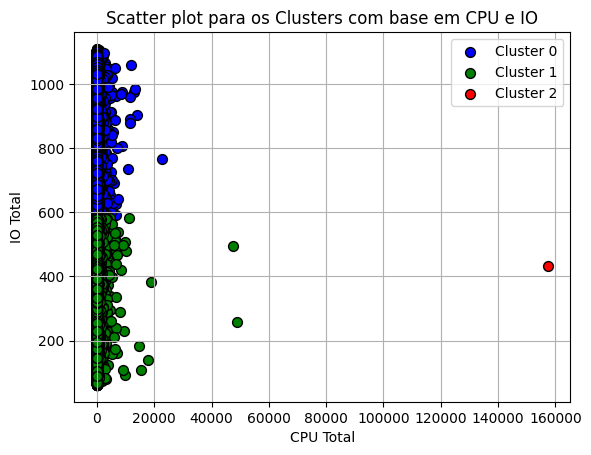

In [256]:
# Scatter plot para o Cluster 0: CPU_Total vs IO_Total
plt.scatter(df[df.cluster == 0]['CPU_Total'].values,
            df[df.cluster == 0]['IO_Total'].values, color='blue', edgecolor='k', s=50, label='Cluster 0')

# Scatter plot para o Cluster 1: CPU_Total vs IO_Total
plt.scatter(df[df.cluster == 1]['CPU_Total'].values,
            df[df.cluster == 1]['IO_Total'].values, color='green', edgecolor='k', s=50, label='Cluster 1')

# Scatter plot para o Cluster 2: CPU_Total vs IO_Total
plt.scatter(df[df.cluster == 2]['CPU_Total'].values,
            df[df.cluster == 2]['IO_Total'].values, color='red', edgecolor='k', s=50, label='Cluster 2')

# Configurações dos eixos e título
plt.xlabel('CPU Total')
plt.ylabel('IO Total')
plt.legend()
plt.grid(True)
plt.title('Scatter plot para os Clusters com base em CPU e IO')
plt.show()


Um gráfico de dispersão deve ser construído mostrando uma cor diferente para os clusters de cada componente da base de dados, como no gráfico acima.
O gráfico acima mostra os componentes dentro de cada um dos 2 clusters identificados, veja que o resultado do cluster é idêntico à formação de clusters naturais da base de dados.


**Análise de Silhouette :**

In [261]:
from sklearn.utils import resample

# Subset to 10% of the data or a smaller fraction
X_sampled, cluster_labels_sampled = resample(X_scaler, cluster_labels, n_samples=int(0.1 * len(X_scaler)), random_state=42)

silhouette = metrics.silhouette_score(X_sampled, cluster_labels_sampled, metric='euclidean')


índice de Silhouette mede a qualidade da separação entre os clusters. Valores próximos de 1 indicam boa separação entre clusters, enquanto valores próximos de 0 indicam que os clusters se sobrepõem.

In [264]:
from sklearn.utils import resample
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import time

# Assuming X_scaler contains your dataset
lsilhouette = []
lknumber = range(2, 5)

for k in lknumber:
    # Semente de número aleatório
    np.random.seed(int(time.time()))
    rand_number = np.random.randint(2**11)

    # Execução do algoritmo para cada valor de k com sampleamento de 10% dos dados
    X_sampled = resample(X_scaler, n_samples=int(0.1 * len(X_scaler)), random_state=rand_number)
    kmeans = KMeans(n_clusters=k, n_init=rand_number)
    kmeans.fit(X_sampled)

    # Rótulos de cada cluster
    cluster_labels = kmeans.labels_

    # Cálculo do índice de Silhouette com os dados amostrados
    silhouette = metrics.silhouette_score(X_sampled, cluster_labels, metric='euclidean')

    # Armazenando no vetor o valor de cada índice
    lsilhouette.append(silhouette)

 #   print(f"Rand number = {rand_number}, K = {k}: {silhouette:.2f}")


    print("Rand number = %d, K = %d: %.2f"%(rand_number,k,silhouette))

Rand number = 1910, K = 2: 0.59
Rand number = 1579, K = 3: 0.59
Rand number = 1017, K = 4: 0.59


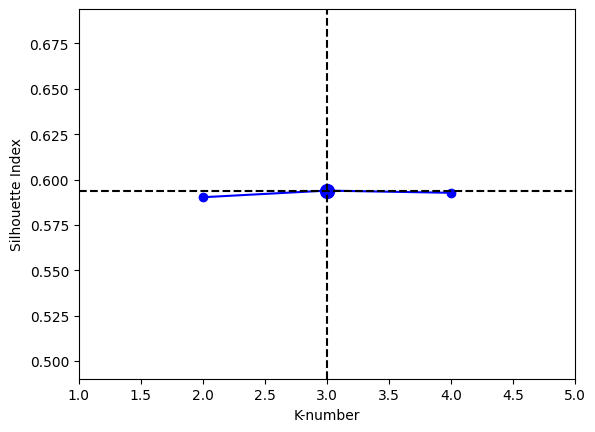

In [277]:
# Plotar a linha principal para lknumber e lsilhouette
plt.plot(lknumber, lsilhouette, color='blue', ls='-', marker='o')

# Adicionar uma linha tracejada preta no valor k = 3
plt.axvline(x=3, color='k', ls='--')

# Adicionar uma linha tracejada horizontal preta no valor de lsilhouette[1]
plt.axhline(y=lsilhouette[1], color='k', ls='--')

# Adicionar uma linha tracejada vermelha no valor y = 0.25
plt.axhline(y=0.25, color='red', ls="--")

# Adicionar um ponto de dispersão em lknumber[1] e lsilhouette[1]
plt.scatter(lknumber[1], lsilhouette[1], color='blue', s=100)

# Ajustar os limites dos eixos com base em lknumber e lsilhouette
plt.xlim(min(lknumber) - 1, max(lknumber) + 1)
plt.ylim(min(lsilhouette) - 0.1, max(lsilhouette) + 0.1)

# Rótulos dos eixos
plt.xlabel('K-number')
plt.ylabel('Silhouette Index')

# Exibir o gráfico
plt.show()


No gráfico acima, a linha vermelha tracedada representa o limiar para o índice de Silhoutte:
Valores abaixo de 0.25 indicam fraca coesão intraclusters (entre cada componente dentro dos clusters) e fraca separação interclusters (entre os clusters).
Valores acima de 0.25 já indicam uma boa coesão intracluster entre cada componente dentro dos clusters) e uma boa separação intercluster (entre os clusters).
Quanto maior o valor do índice de Silhoutte, melhor é o número K de clusters. No gráfico acima, o maior valor é o de K = 3 que apresenta um índice de Silhoutte igual a 0.46. Valores negativos indicam péssima formação de clusters, ou seja, mostra que não há clara separação entre os componentes dos clusters.

Gera um gráfico com o número de clusters (k) no eixo xeo índice de Silhouette no eixo y.
O objetivo é encontrar o valor de k que maximize o índice de Silhouette, ou seja, que resulte na melhor separação entre os clusters.

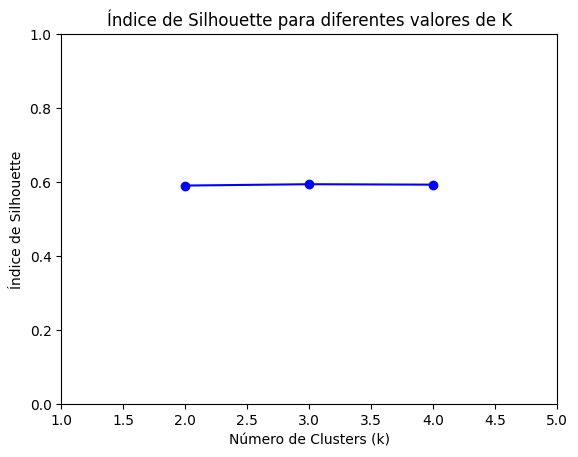

In [278]:
plt.plot(lknumber, lsilhouette, color='blue', ls='-', marker='o')
plt.xlim(1, 5)  # Correção: expandir os limites, dependendo da faixa testada
plt.ylim(0, 1)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Índice de Silhouette')
plt.title('Índice de Silhouette para diferentes valores de K')
plt.show()

**I)**

Rotulação dos clusters:
 Os clusters podem ser rotulados com base na utilização de recursos do sistema. Por exemplo:

Cluster 1: Alta demanda de CPU e I/O.
Cluster 2: Média demanda de CPU e I/O.
Cluster 3: Baixa demanda de CPU e I/O.

**J)**


A análise dos dados do servidor, utilizando a Análise de Componentes Principais (PCA) e a clusterização K-Means, revelou informações importantes sobre o uso dos recursos do sistema. A PCA demonstrou que a maior parte da variação nos dados está ligada ao uso combinado da CPU e das operações de leitura e escrita nos discos, demonstrando que o desempenho do servidor está intimamente relacionado a esses dois fatores. Com a clusterização K-Means, foi possível identificar três grupos diferentes de transações: o primeiro grupo, representando momentos de carga normal com uso moderado da CPU e dos discos; o segundo grupo, refletindo momentos de pico no servidor, com alto uso de CPU e operações de E/S, geralmente associados a grandes processamentos ou consultas pesadas; e o terceiro grupo, que se caracteriza por uma carga específica entre os picos e a carga normal. Esses resultados são fundamentais para compreender o comportamento do servidor em diferentes cenários e podem orientar a otimização na alocação de recursos, especialmente em momentos de maior demanda. Apesar da identificação de outliers, optou-se por mantê-los, uma vez que podem representar eventos críticos no uso do servidor, como picos de carga que precisam ser detalhados mais detalhadamente.